Computing...
Took 0.043443918228149414
Energy eigenvalues (in eV):
[ 13.8243627   41.46350403  69.08346722  96.68423227 124.26577906
 151.82808744 179.37113718 206.89490796 234.39937942 261.8845311
 289.35034249 316.79679298 344.22386192 371.63152856 399.01977209
 426.38857162 453.73790619 481.06775475 508.3780962  535.66890934
 562.9401729  590.19186555 617.42396585 644.63645231 671.82930335
 699.00249732 726.15601246 753.28982697 780.40391895 807.49826642]


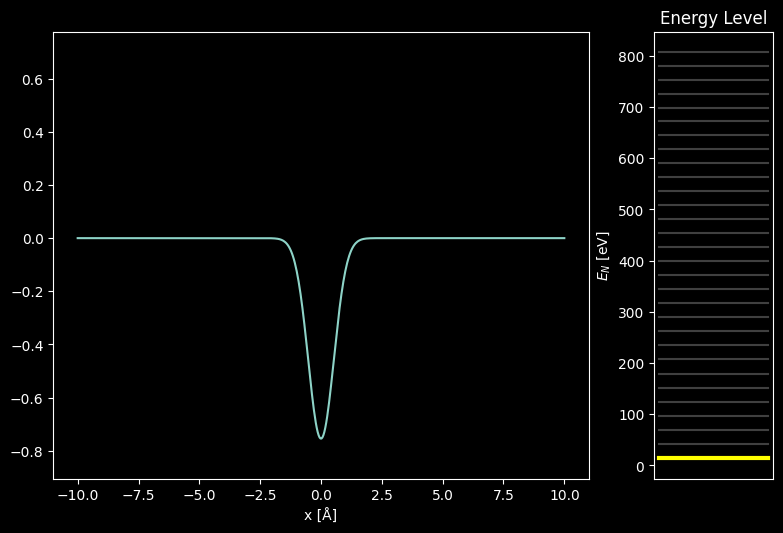

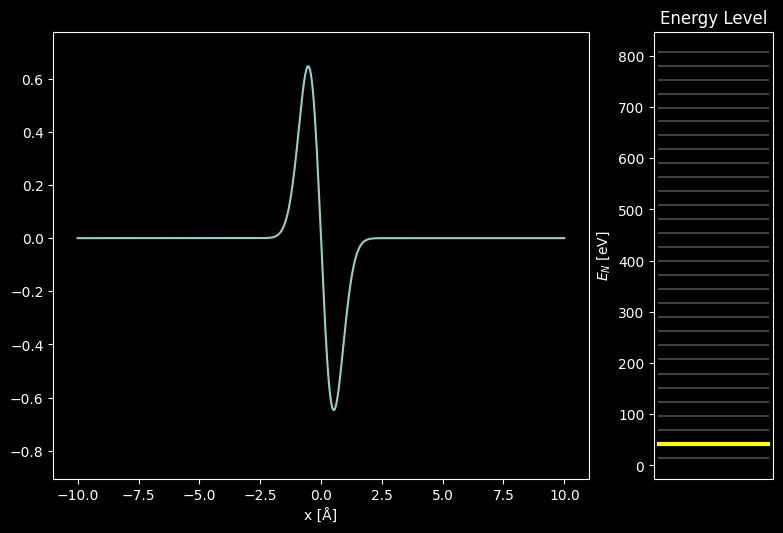

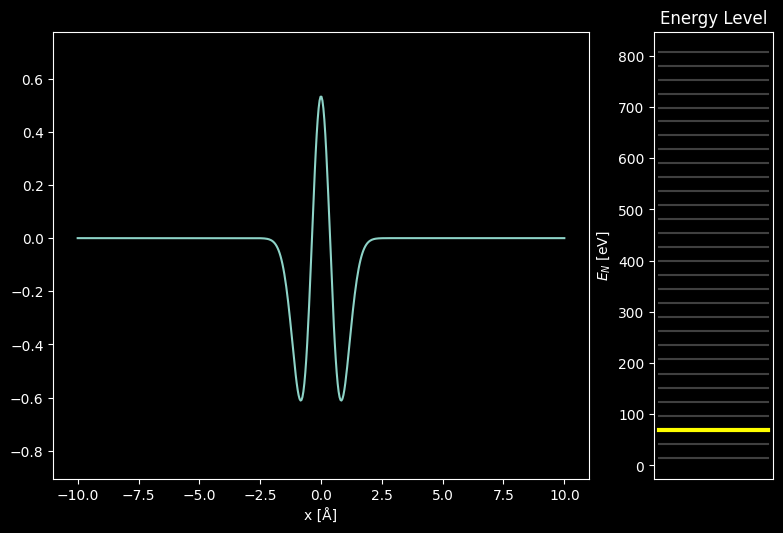

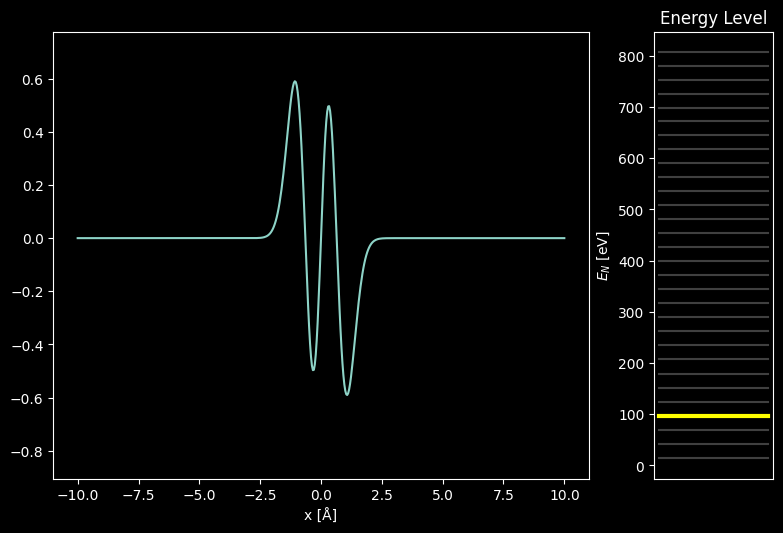

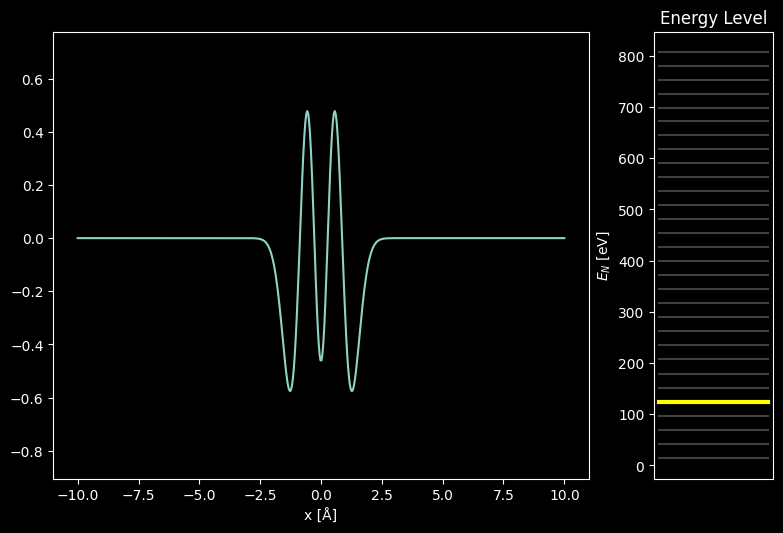

In [3]:

import sys
!{sys.executable} -m pip install qmsolve


import numpy as np
import matplotlib.pyplot as plt
from qmsolve import Hamiltonian, SingleParticle, init_visualization, Å, eV


def harmonic_oscillator(particle):
    k = 100 * eV / Å**2
    return 0.5 * k * particle.x**2


H = Hamiltonian(
    particles=SingleParticle(),
    potential=harmonic_oscillator,
    spatial_ndim=1,
    N=512,
    extent=20*Å
)


eigenstates = H.solve(max_states=30)

print("Energy eigenvalues (in eV):")
print(eigenstates.energies)


visualization = init_visualization(eigenstates)
for n in range(5):
    visualization.plot_eigenstate(n)


1. The Hamiltonian is an operator that represents the total energy of a system, both the kinetic and potential energy.
https://en.wikipedia.org/wiki/Hamiltonian_(quantum_mechanics)
2.Hooks law is represented.
3.These are quantum energy eigenstates that correspond to solutions of the equation.
https://chem.libretexts.org/Courses/Pacific_Union_College/Quantum_Chemistry/03%3A_The_Schrodinger_Equation_and_a_Particle_in_a_Box/3.03%3A_The_Schr%C3%B6dinger_Equation_is_an_Eigenvalue_Problem

Computing...
Took 0.030382156372070312
Infinite square well energies (eV):
[  0.58926935   2.35704264   5.30321556   9.4276143   14.7299955
  21.21004635  28.8673845   37.70155819  47.71204619  58.89825789
  71.2595333   84.79514311  99.50428872 115.3861023  132.43964681
 150.6639161  170.05783494 190.6202591  212.34997539 235.24570176
 259.30608737 284.52971266 310.91508944 338.46066097 367.16480207
 397.0258192  428.04195057 460.21136622 493.53216816 528.00239048]


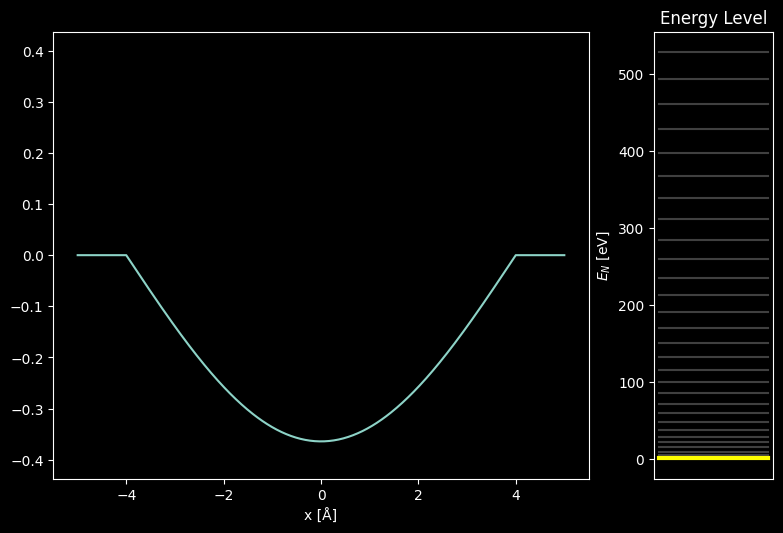

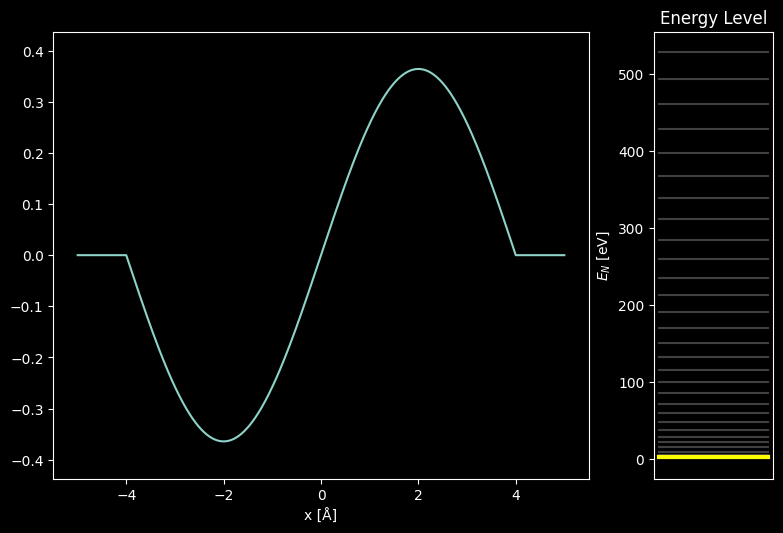

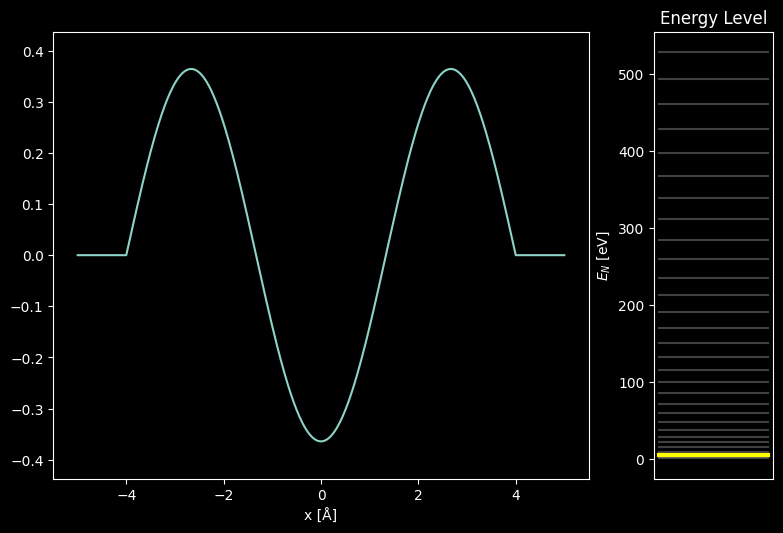

Computing...
Took 0.011188268661499023

Finite square well energies (eV):
[  0.53803872   2.15158316   4.83888034   8.59687598  13.42099002
  19.3047426   26.23914444  34.21168625  43.20459372  53.19162646
  64.13172021  75.95502756  88.52835074 101.55842594 114.32016055
 125.37305797 134.41418043 144.34611226 157.42339255 172.80926808
 189.20594928 205.79649393 222.1353246  238.37322185 255.27661393
 273.58579849 293.46023361 314.60112929 336.57991836 359.00942014]


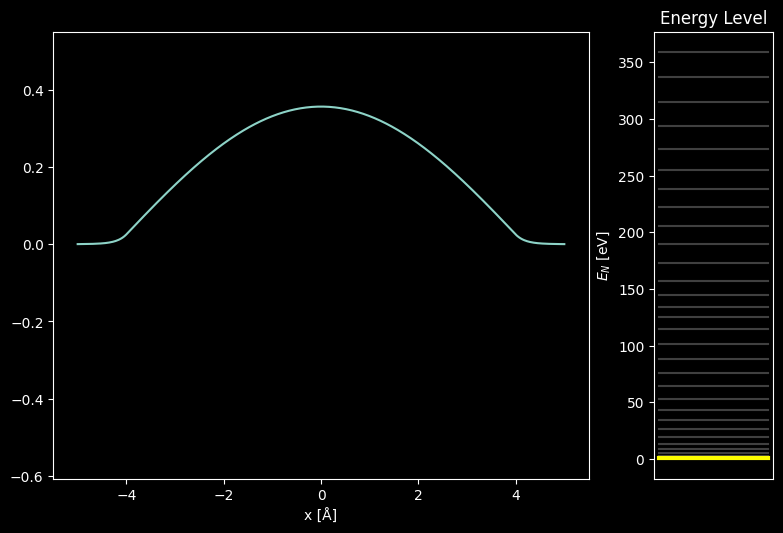

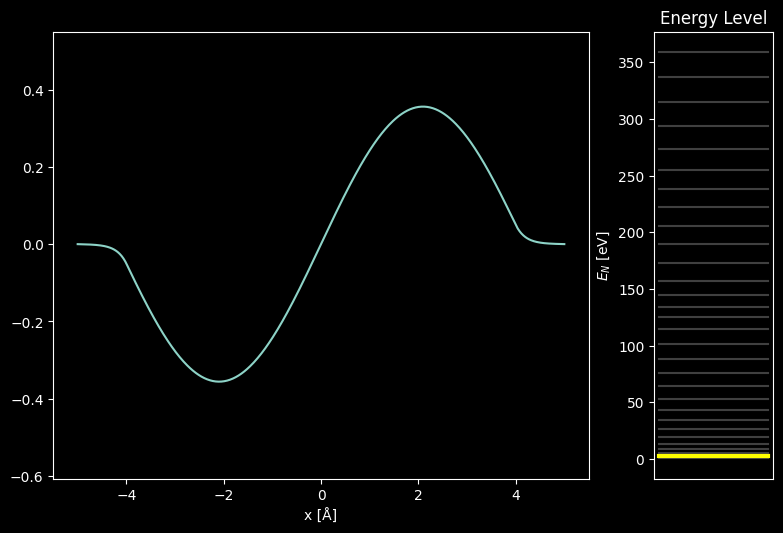

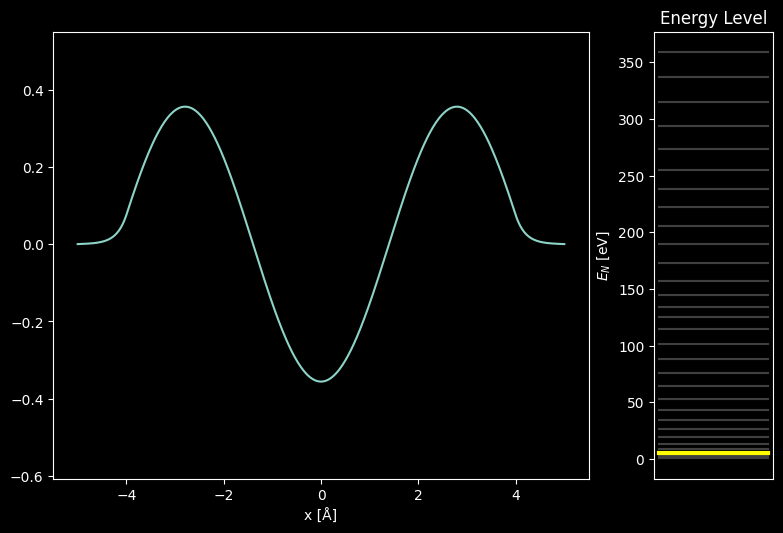

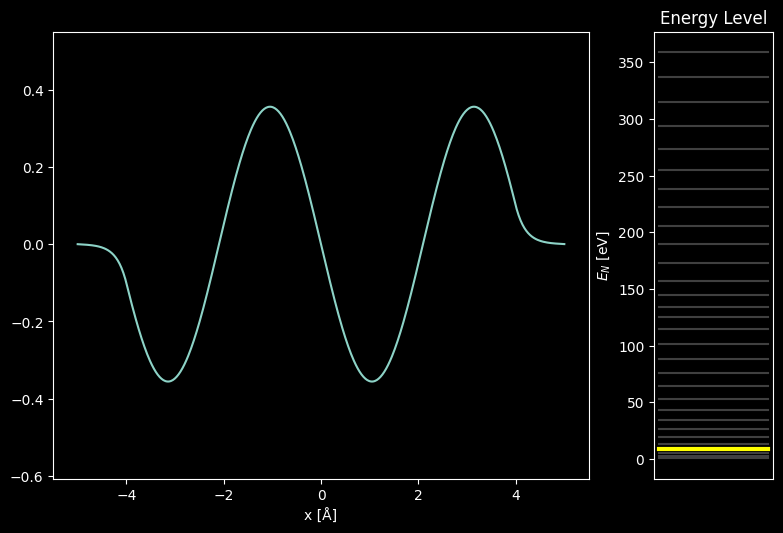

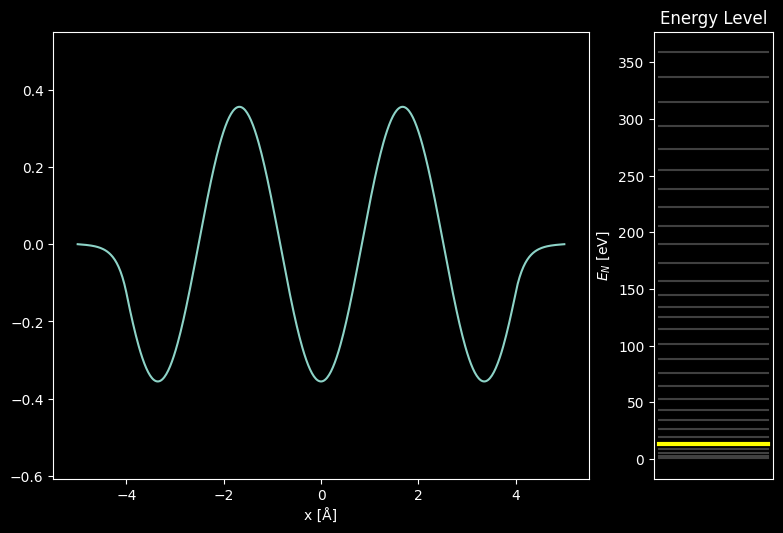

In [4]:
import sys
!{sys.executable} -m pip install qmsolve

import numpy as np
import matplotlib.pyplot as plt
from qmsolve import Hamiltonian, SingleParticle, init_visualization, Å, eV


def infinite_square_well(particle):
    potential = np.zeros_like(particle.x)
    out_of_bounds = np.abs(particle.x) > 4 * Å
    potential[out_of_bounds] = np.inf
    return potential

H_sw = Hamiltonian(
    particles=SingleParticle(),
    potential=infinite_square_well,
    spatial_ndim=1,
    N=512,
    extent=10 * Å
)

eigenstates_sw = H_sw.solve(max_states=30)
print("Infinite square well energies (eV):")
print(eigenstates_sw.energies)

visualization_sw = init_visualization(eigenstates_sw)
for n in range(3):
    visualization_sw.plot_eigenstate(n)


def finite_square_well(particle):
    potential = np.zeros_like(particle.x)
    out_of_bounds = np.abs(particle.x) > 4 * Å
    potential[out_of_bounds] = 100 * eV
    return potential

H_fsw = Hamiltonian(
    particles=SingleParticle(),
    potential=finite_square_well,
    spatial_ndim=1,
    N=512,
    extent=10 * Å
)

eigenstates_fsw = H_fsw.solve(max_states=30)
print("\nFinite square well energies (eV):")
print(eigenstates_fsw.energies)

visualization_fsw = init_visualization(eigenstates_fsw)
for n in range(5):
    visualization_fsw.plot_eigenstate(n)


8. Infinite square wells must go to 0 at boundaries.
9. The number of extrema, ie (maximum+minimum) have to equal n.
11. We know due to quantum tunneling there is a chance for a particle to exist outside the well.